In [1]:
from sqlalchemy import create_engine,text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
db_user = ""
db_password = ""
db_host = "" 
db_port = ""  
db_name = ""

In [3]:
connection = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection)

In [4]:
ACE = '08|037|025%' #inserire layerid Ace
nome_ACE = 'Dozza' #inserire nome Ace

Eta

In [6]:
query_toid = text("""
SELECT DATE(datefrom) AS date,
       SUM(f1) AS "Minorenni",
       SUM(f2) AS "18-30",
       SUM(f3) AS "31-40",
       SUM(f4) AS "41-50",
       SUM(f5) AS "51-60",
       SUM(f6) AS ">60"
FROM movements
WHERE toid LIKE '""" + ACE + """' 
GROUP BY date
ORDER BY date;
""")
try:
    with engine.connect() as connection:
        result = connection.execute(query_toid)
        df_toid = pd.DataFrame(result.fetchall(), columns=result.keys())
        print(df_toid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  Minorenni  18-30  31-40  41-50  51-60   >60
0   2019-08-01         89   1020   1063   2237   2376  3456
1   2019-08-02         94    966   1005   2131   2273  3283
2   2019-08-03         77    849    887   1999   2158  3218
3   2019-08-04         52    731    747   1690   1833  2704
4   2019-08-05         62    812    850   1841   1964  2902
..         ...        ...    ...    ...    ...    ...   ...
56  2019-09-26        121   1096   1107   2288   2441  3650
57  2019-09-27        111   1039   1023   2105   2257  3345
58  2019-09-28        108   1027    978   2134   2304  3449
59  2019-09-29         93   1024    982   2142   2294  3365
60  2019-09-30        104   1049   1042   2181   2304  3416

[61 rows x 7 columns]


In [7]:
query_layerid = text("""
SELECT DATE(datefrom) AS date,
       SUM(f1) AS "Minorenni",
       SUM(f2) AS "18-30",
       SUM(f3) AS "31-40",
       SUM(f4) AS "41-50",
       SUM(f5) AS "51-60",
       SUM(f6) AS ">60"
FROM movements
WHERE layerid LIKE '""" + ACE + """' 
GROUP BY date
ORDER BY date;
""")
try:
    with engine.connect() as connection:
        result = connection.execute(query_layerid)
        df_layerid = pd.DataFrame(result.fetchall(), columns=result.keys())
        print(df_layerid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  Minorenni  18-30  31-40  41-50  51-60   >60
0   2019-08-01         93    923    906   2130   2338  3112
1   2019-08-02         94    867    853   2073   2315  3017
2   2019-08-03         83    872    881   2245   2469  3170
3   2019-08-04         47    652    672   1689   1868  2401
4   2019-08-05         68    777    792   1966   2228  2836
..         ...        ...    ...    ...    ...    ...   ...
56  2019-09-26        101    890    956   2175   2298  3200
57  2019-09-27        111   1017   1064   2330   2474  3374
58  2019-09-28        112   1026   1086   2352   2530  3407
59  2019-09-29        107   1010   1019   2342   2513  3304
60  2019-09-30        110   1007   1023   2255   2443  3313

[61 rows x 7 columns]


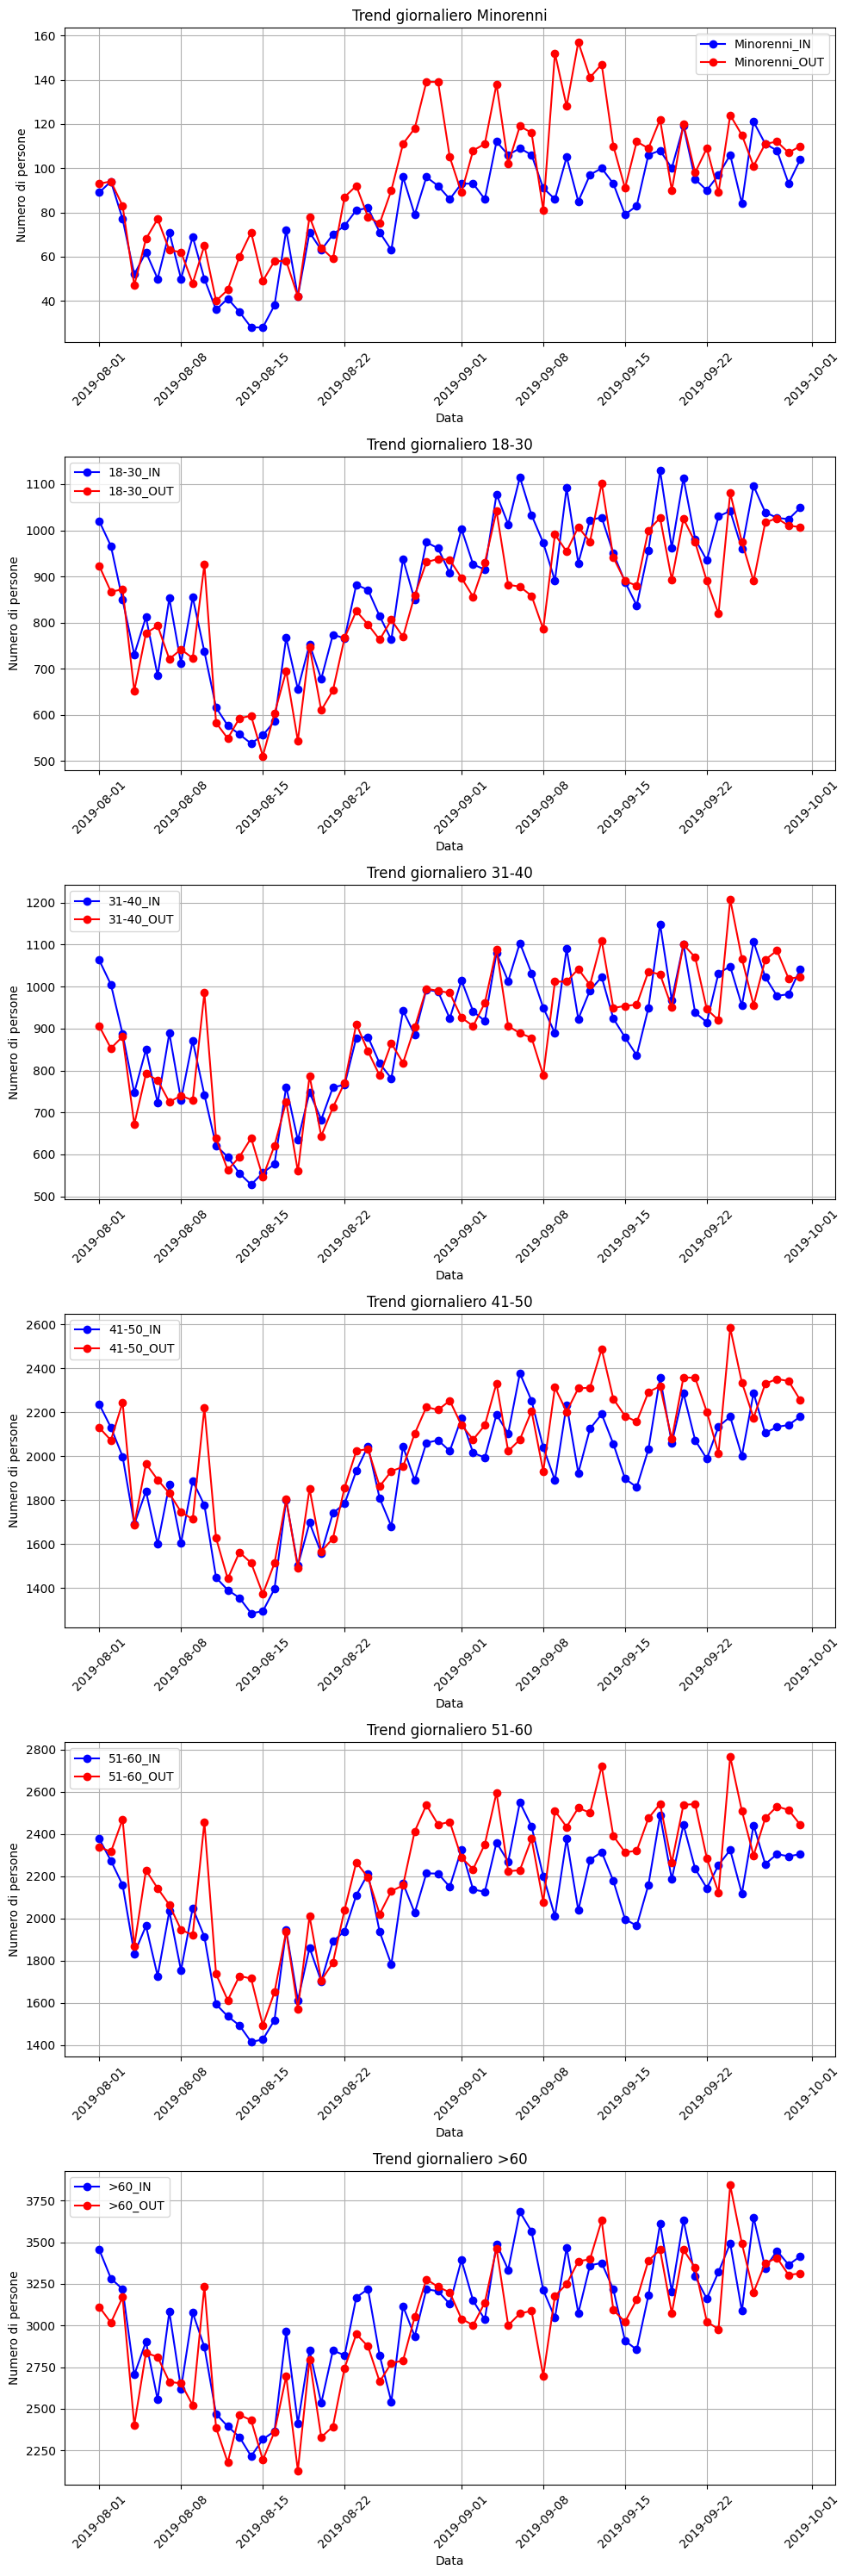

In [8]:
categorie = ["Minorenni", "18-30", "31-40", "41-50", "51-60", ">60"]

fig, axes = plt.subplots(6, 1, figsize=(10, 30))  # Layout 2x3
axes = axes.flatten()  # Per iterare più facilmente sugli assi

for i, categoria in enumerate(categorie):
    ax = axes[i]
    
    ax.plot(df_toid["date"], df_toid[categoria], label=f'{categoria}_IN', marker='o', linestyle='-', color='b')
    ax.plot(df_layerid["date"], df_layerid[categoria], label=f'{categoria}_OUT', marker='o', linestyle='-', color='r')

    ax.set_xlabel("Data")
    ax.set_ylabel("Numero di persone")
    ax.set_title(f"Trend giornaliero {categoria}")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Ruota le date sull'asse X

plt.tight_layout()  # Evita sovrapposizioni
plt.show()

Motivo Spostamento

In [10]:
query_toid = text("SELECT DATE(datefrom) AS date, SUM(tb) AS business, SUM(tc) AS consumer FROM movements WHERE toid LIKE '" + ACE + "' GROUP BY date ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_toid, connection, chunksize=1000) 
        df_toid = pd.concat(chunks, ignore_index=True) 
    print(df_toid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  business  consumer
0   2019-08-01      1190      9051
1   2019-08-02      1091      8661
2   2019-08-03       810      8378
3   2019-08-04       619      7138
4   2019-08-05       877      7554
..         ...       ...       ...
56  2019-09-26      1127      9576
57  2019-09-27      1032      8848
58  2019-09-28       884      9116
59  2019-09-29       855      9045
60  2019-09-30      1038      9058

[61 rows x 3 columns]


In [11]:
query_layerid = text("SELECT DATE(datefrom) AS date, SUM(tb) AS business, SUM(tc) AS consumer FROM movements WHERE layerid LIKE '"+ ACE +"' GROUP BY date ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_layerid, connection, chunksize=1000) 
        df_layerid = pd.concat(chunks, ignore_index=True) 
    print(df_layerid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  business  consumer
0   2019-08-01      1025      8477
1   2019-08-02       936      8283
2   2019-08-03       962      8758
3   2019-08-04       707      6622
4   2019-08-05       865      7802
..         ...       ...       ...
56  2019-09-26       968      8652
57  2019-09-27      1036      9334
58  2019-09-28      1051      9462
59  2019-09-29       993      9302
60  2019-09-30      1010      9141

[61 rows x 3 columns]


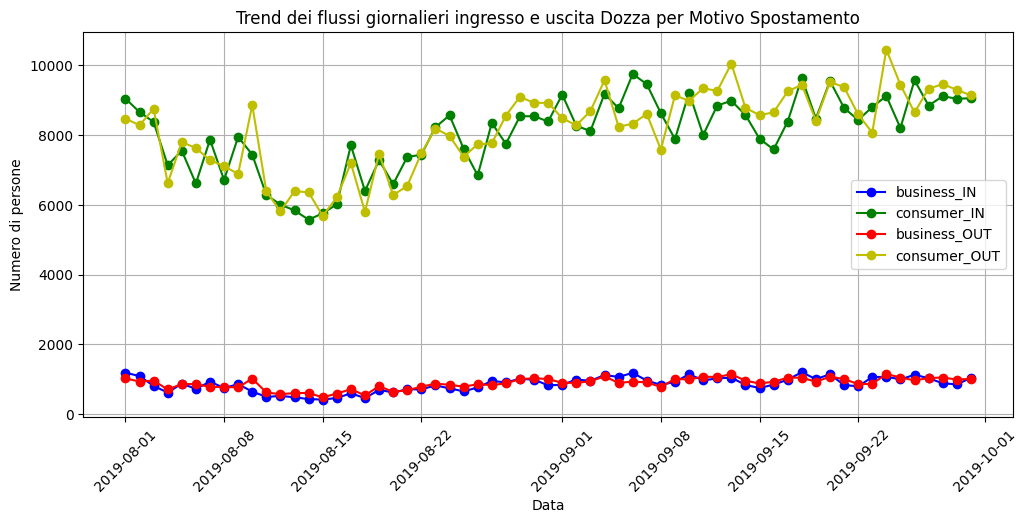

In [12]:
plt.figure(figsize=(12, 5))

plt.plot(df_toid["date"], df_toid["business"], label = 'business_IN', marker='o', linestyle='-', color='b')
plt.plot(df_toid["date"], df_toid["consumer"], label = 'consumer_IN', marker='o', linestyle='-', color='g')

plt.plot(df_layerid["date"], df_layerid["business"], label = 'business_OUT', marker='o', linestyle='-', color='r')
plt.plot(df_layerid["date"], df_layerid["consumer"], label = 'consumer_OUT', marker='o', linestyle='-', color='y')

plt.xlabel("Data")
plt.ylabel("Numero di persone")
plt.title("Trend dei flussi giornalieri ingresso e uscita " + nome_ACE + " per Motivo Spostamento")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Nazionalita

In [14]:
query_toid = text("SELECT DATE(datefrom) AS date, SUM(ni) AS italiani, SUM(ns) AS stranieri FROM movements WHERE toid LIKE '" + ACE + "' GROUP BY date ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_toid, connection, chunksize=1000) 
        df_toid = pd.concat(chunks, ignore_index=True) 
    print(df_toid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  italiani  stranieri
0   2019-08-01      9195       1046
1   2019-08-02      8764        988
2   2019-08-03      8243        945
3   2019-08-04      6997        760
4   2019-08-05      7655        776
..         ...       ...        ...
56  2019-09-26     10528        175
57  2019-09-27      9732        148
58  2019-09-28      9858        142
59  2019-09-29      9770        130
60  2019-09-30      9987        109

[61 rows x 3 columns]


In [15]:
query_layerid = text("SELECT DATE(datefrom) AS date, SUM(ni) AS italiani, SUM(ns) AS stranieri FROM movements WHERE layerid LIKE '"+ ACE +"' GROUP BY date ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_layerid, connection, chunksize=1000) 
        df_layerid = pd.concat(chunks, ignore_index=True) 
    print(df_layerid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  italiani  stranieri
0   2019-08-01      8541        961
1   2019-08-02      8306        913
2   2019-08-03      8754        966
3   2019-08-04      6639        690
4   2019-08-05      7859        808
..         ...       ...        ...
56  2019-09-26      9545         75
57  2019-09-27     10284         86
58  2019-09-28     10409        104
59  2019-09-29     10204         91
60  2019-09-30     10074         77

[61 rows x 3 columns]


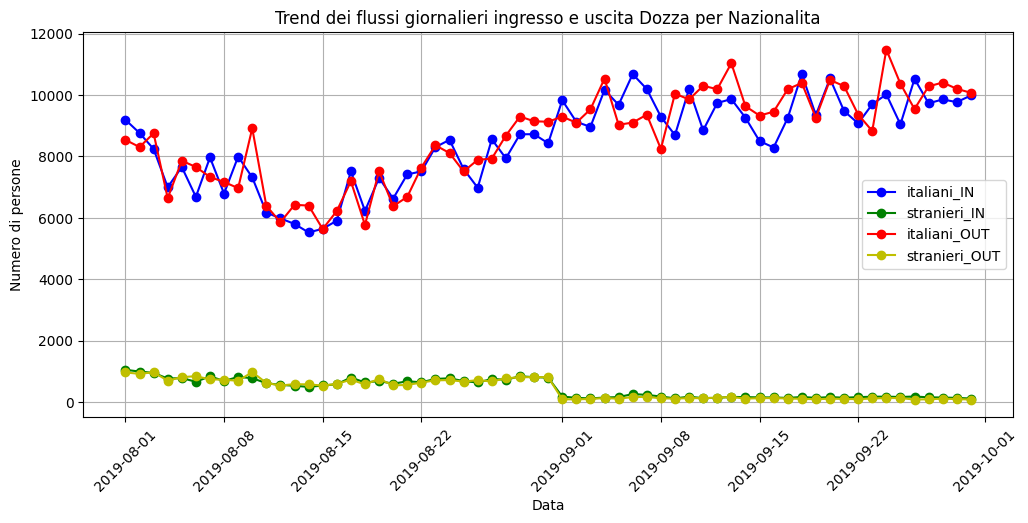

In [16]:
plt.figure(figsize=(12, 5))

plt.plot(df_toid["date"], df_toid["italiani"], label = 'italiani_IN', marker='o', linestyle='-', color='b')
plt.plot(df_toid["date"], df_toid["stranieri"], label = 'stranieri_IN', marker='o', linestyle='-', color='g')

plt.plot(df_layerid["date"], df_layerid["italiani"], label = 'italiani_OUT', marker='o', linestyle='-', color='r')
plt.plot(df_layerid["date"], df_layerid["stranieri"], label = 'stranieri_OUT', marker='o', linestyle='-', color='y')

plt.xlabel("Data")
plt.ylabel("Numero di persone")
plt.title("Trend dei flussi giornalieri ingresso e uscita " + nome_ACE + " per Nazionalita")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Genere

In [18]:
query_toid = text("SELECT DATE(datefrom) AS date, SUM(gm) AS uomini, SUM(gf) AS donne FROM movements WHERE toid LIKE '" + ACE + "' GROUP BY date ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_toid, connection, chunksize=1000) 
        df_toid = pd.concat(chunks, ignore_index=True) 
    print(df_toid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  uomini  donne
0   2019-08-01    5764   4477
1   2019-08-02    5519   4233
2   2019-08-03    5149   4039
3   2019-08-04    4358   3399
4   2019-08-05    4766   3665
..         ...     ...    ...
56  2019-09-26    5959   4744
57  2019-09-27    5468   4412
58  2019-09-28    5538   4462
59  2019-09-29    5499   4401
60  2019-09-30    5602   4494

[61 rows x 3 columns]


In [19]:
query_layerid = text("SELECT DATE(datefrom) AS date, SUM(gm) AS uomini, SUM(gf) AS donne FROM movements WHERE layerid LIKE '"+ ACE +"' GROUP BY date ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_layerid, connection, chunksize=1000) 
        df_layerid = pd.concat(chunks, ignore_index=True) 
    print(df_layerid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  uomini  donne
0   2019-08-01    5369   4133
1   2019-08-02    5244   3975
2   2019-08-03    5514   4206
3   2019-08-04    4140   3189
4   2019-08-05    4930   3737
..         ...     ...    ...
56  2019-09-26    5417   4203
57  2019-09-27    5832   4538
58  2019-09-28    5935   4578
59  2019-09-29    5721   4574
60  2019-09-30    5697   4454

[61 rows x 3 columns]


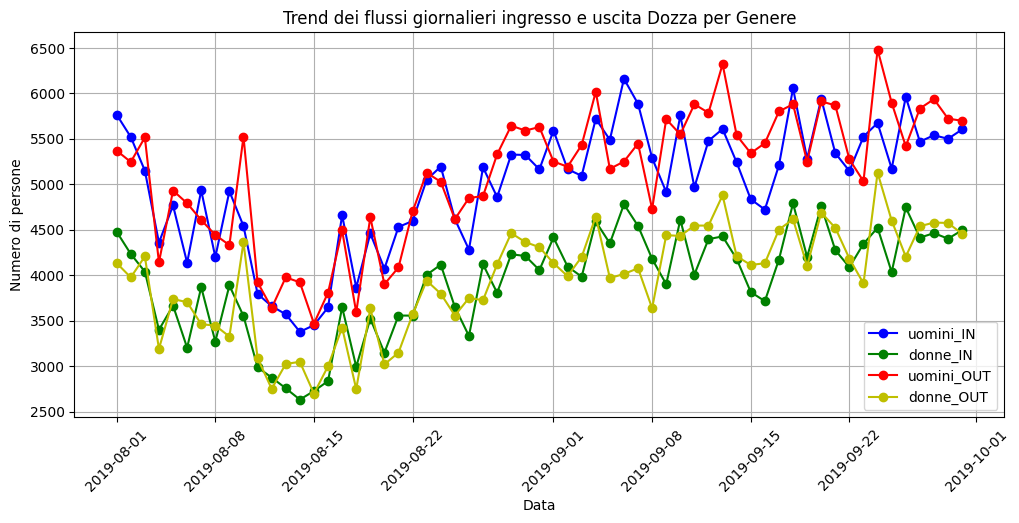

In [20]:
plt.figure(figsize=(12, 5))

plt.plot(df_toid["date"], df_toid["uomini"], label = 'uomini_IN', marker='o', linestyle='-', color='b')
plt.plot(df_toid["date"], df_toid["donne"], label = 'donne_IN', marker='o', linestyle='-', color='g')

plt.plot(df_layerid["date"], df_layerid["uomini"], label = 'uomini_OUT', marker='o', linestyle='-', color='r')
plt.plot(df_layerid["date"], df_layerid["donne"], label = 'donne_OUT', marker='o', linestyle='-', color='y')

plt.xlabel("Data")
plt.ylabel("Numero di persone")
plt.title("Trend dei flussi giornalieri ingresso e uscita " + nome_ACE + " per Genere")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()